# Setup 

In [19]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from decision_tree import DecisionTree
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.make_blobs(random_state = 3142) 

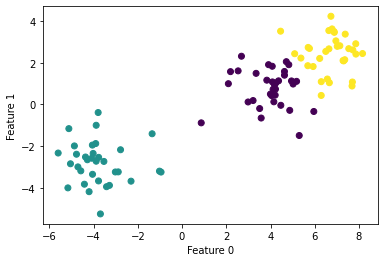

In [3]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

# Random forest

No real equation, just making N random decision trees and majority vote will be the final prediciton.

In [16]:
class RandomForest:
    def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

        
    def bagging(X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def most_common_label(y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split, max_depth=self.max_depth, 
                                n_feats=self.n_feats, show_viz = False)
            X_samp, y_samp = bagging(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = [tree.predict(X) for tree in self.trees]
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return y_pred

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

clf = RandomForest(n_trees=10, max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#can only rely on accuracy, no easy way to visualize decisions
print(f"Accuracy: {np.sum(y_test == y_pred) / len(y_test)}")

Accuracy: 0.95
